In [1]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read Data

In [3]:
# Download from https://www.bankofcanada.ca/rates/interest-rates/bond-yield-curves/
dataset = pd.read_csv('yield_curves_20190730.csv', parse_dates = ['Date'], encoding='utf-8')

# select corresponding yield curve colum
dataset = dataset[['Date', ' ZC100YR',' ZC200YR',' ZC300YR',' ZC500YR',' ZC1000YR',' ZC1500YR',' ZC2000YR',' ZC3000YR']]

# drop na column
dataset = dataset[dataset[' ZC3000YR'] != ' na']
print("The daily yield curve shape is ", dataset.shape)

The daily yield curve shape is  (7052, 9)


In [4]:
# assign the week number and year number
dataset['Week_num']=dataset['Date'].dt.week
dataset['Year']=dataset['Date'].dt.year

# construct weekly data by retriving the earliest date within a week 
Weekly_data= dataset.loc[dataset.groupby(['Week_num','Year'])['Date'].idxmin()]

# sort them based on date
Weekly_data = Weekly_data.sort_values(by = ['Date'])
# shows the structure
Weekly_data.head()

,Date,ZC100YR,ZC200YR,ZC300YR,ZC500YR,ZC1000YR,ZC1500YR,ZC2000YR,ZC3000YR,Week_num,Year
1305,1991-01-02,0.1048713100,0.1026496500,0.1015680000,0.0991824860,0.0994143380,0.1013164600,0.0982300860,0.1150025500,1,1991
1308,1991-01-07,0.1031550600,0.1016053500,0.1009812000,0.0993536840,0.1005140200,0.1032523700,0.1008646000,0.1175229100,2,1991
1313,1991-01-14,0.1013783600,0.1007159000,0.1004787800,0.0995208430,0.1005186600,0.1035745900,0.1013700600,0.1183947400,3,1991
1318,1991-01-21,0.1017413900,0.0990498600,0.0981166640,0.0985723920,0.0988578550,0.1021891100,0.0994724860,0.1163547300,4,1991
1323,1991-01-28,0.0992810810,0.0971869870,0.0969927390,0.0982834550,0.0981984010,0.1014536000,0.0989841620,0.1163158800,5,1991


In [5]:
print("The weekly yield curve shape is",Weekly_data.shape)

The weekly yield curve shape is (1489, 11)


# Prepare Input for PCA

In [6]:
# Convert yield curve data to numeric
cols = Weekly_data.columns.drop('Date')
Weekly_data[cols] = Weekly_data[cols].apply(pd.to_numeric, errors='coerce')

#Prepare Input yield curve
w_data = Weekly_data.values
X = w_data[:,1:9]

# Principle Component Analysis
## Find the biggest variance in the 1st PC

In [7]:
# choose only 3 components
n_comp = 3
pca = PCA(n_components=n_comp)
pca.fit(X)  
print(" The variance ratio: ", pca.explained_variance_ratio_) 

 The variance ratio:  [0.96790749 0.02848438 0.00201113]


In [8]:
# Get the eigen Vector
eigVec = pca.components_
print("The eigen Vector is ", eigVec)

The eigen Vector is  [[ 0.34039971  0.35565537  0.3619667   0.36445498  0.35823976  0.35352307
   0.35071282  0.34274802]
 [ 0.56939889  0.40201807  0.26070077  0.06326356 -0.20330159 -0.3289942
  -0.40081391 -0.36328873]
 [ 0.39513307 -0.02779955 -0.23481271 -0.35429713 -0.21131212 -0.07854956
  -0.19093507  0.75838943]]


In [9]:
# find the biggest variance in the 1st PC
PCA_indicator = np.argmax(eigVec[0,:])
print("PCA 1st compoenent : ", Weekly_data.columns[PCA_indicator+1])

PCA 1st compoenent :   ZC500YR


# Plot PCA Curve

In [10]:
x_label = np.array(['1Y','2Y','3Y','5Y','10Y','15Y','20Y','30Y'])
#construct
df = pd.DataFrame({'Tenors':x_label,'PC1':eigVec[0,:], 'PC2':eigVec[1,:],'PC3':eigVec[2,:]})  
df

,Tenors,PC1,PC2,PC3
0,1Y,0.340400,0.569399,0.395133
1,2Y,0.355655,0.402018,-0.027800
2,3Y,0.361967,0.260701,-0.234813
3,5Y,0.364455,0.063264,-0.354297
4,10Y,0.358240,-0.203302,-0.211312
5,15Y,0.353523,-0.328994,-0.078550
6,20Y,0.350713,-0.400814,-0.190935
7,30Y,0.342748,-0.363289,0.758389


/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'PC1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Second argument 'PC2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'PC3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.


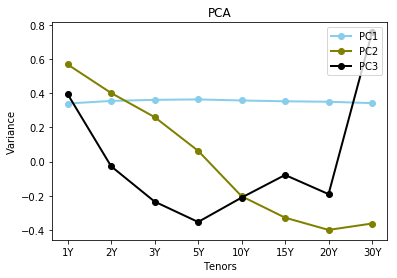

In [11]:
# plot
plt.plot('Tenors', 'PC1', data=df, marker='o',color='skyblue', linewidth=2)
plt.plot('Tenors', 'PC2', data=df, marker='o', color='olive', linewidth=2)
plt.plot('Tenors', 'PC3', data=df, marker='o', color='black', linewidth=2)

plt.title('PCA')
plt.xlabel('Tenors')
plt.ylabel('Variance')

plt.legend(loc='upper right')
plt.show()

# Explore Input Data

In [12]:
Weekly_data.head()

,Date,ZC100YR,ZC200YR,ZC300YR,ZC500YR,ZC1000YR,ZC1500YR,ZC2000YR,ZC3000YR,Week_num,Year
1305,1991-01-02,0.104871,0.102650,0.101568,0.099182,0.099414,0.101316,0.098230,0.115003,1,1991
1308,1991-01-07,0.103155,0.101605,0.100981,0.099354,0.100514,0.103252,0.100865,0.117523,2,1991
1313,1991-01-14,0.101378,0.100716,0.100479,0.099521,0.100519,0.103575,0.101370,0.118395,3,1991
1318,1991-01-21,0.101741,0.099050,0.098117,0.098572,0.098858,0.102189,0.099472,0.116355,4,1991
1323,1991-01-28,0.099281,0.097187,0.096993,0.098283,0.098198,0.101454,0.098984,0.116316,5,1991


In [13]:
#retrieve output, by calculate the delta change
Output_Y = Weekly_data.diff()
Y=Output_Y.values
Y = Y[1:,1:9] # select only relevant and drop the first raw as nan

#scaled the data
X = X*100
Y = Y*10000 

In [14]:
Weekly_data = Weekly_data.drop(['Week_num','Year'],axis=1)
Weekly_data.describe()

,ZC100YR,ZC200YR,ZC300YR,ZC500YR,ZC1000YR,ZC1500YR,ZC2000YR,ZC3000YR
count,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000
mean,0.033529,0.036150,0.038253,0.041523,0.046826,0.050187,0.051809,0.049702
std,0.022923,0.023400,0.023574,0.023587,0.023263,0.023137,0.023138,0.022623
min,0.002998,0.003043,0.003374,0.005145,0.010455,0.015414,0.016882,0.016133
25%,0.010987,0.013679,0.016245,0.019730,0.024898,0.028679,0.030499,0.030378
50%,0.029915,0.033678,0.036928,0.040489,0.044173,0.045875,0.048392,0.046590
75%,0.049336,0.051830,0.053945,0.057676,0.060206,0.062611,0.062564,0.058487
max,0.104871,0.102650,0.101568,0.099521,0.101426,0.104216,0.101513,0.118395


# Plot Yield Curve

In [15]:
# Convert yield curve data to numeric and scale it for drawing
dataset = dataset.drop(['Week_num','Year'],axis=1)
cols = dataset.columns.drop('Date')
dataset[cols] = dataset[cols].apply(pd.to_numeric, errors='coerce')
dataset[cols] = dataset[cols]*100
dataset.set_index('Date',inplace=True)

<Figure size 14400x7200 with 0 Axes>

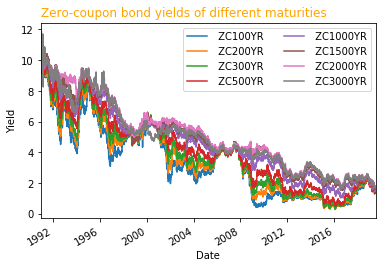

In [16]:
plt.figure(figsize=(200,100))
# Add titles
dataset.plot()
plt.title("Zero-coupon bond yields of different maturities", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Date")
plt.ylabel("Yield")
plt.legend(loc="upper right", ncol=2)
plt.savefig('Yield Curve.png')
plt.show()

# ANN

In [17]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.wrappers.scikit_learn import KerasRegressor
from keras import regularizers
from keras.optimizers import SGD
from keras.layers.core import Dropout
from keras.constraints import max_norm
from keras.callbacks import ModelCheckpoint
import keras.backend as K

Using TensorFlow backend.


In [18]:
#Construct the input for ANN
N_points = len(Y)
PCA_indicator = np.argmax(eigVec[0,:])
Delta_move = Y[:,PCA_indicator]
newX = np.c_[X[0:N_points,:], Delta_move]
newX.shape

(1488, 9)

In [227]:
Y_describe = pd.DataFrame(Y)
Y_describe = Y_describe.apply(pd.to_numeric, errors='coerce')
Y_describe.describe()

,0,1,2,3,4,5,6,7
count,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000
mean,-0.587371,-0.577686,-0.573587,-0.560248,-0.560321,-0.567494,-0.542085,-0.656305
std,15.745892,15.952249,15.042793,14.065159,12.154566,11.439596,10.338101,14.737845
min,-92.351310,-87.990260,-83.696280,-66.750800,-38.486360,-61.536680,-49.123750,-170.791720
25%,-6.116948,-7.474035,-7.860750,-8.178017,-7.787697,-6.729532,-6.466603,-6.322613
50%,-0.036085,-0.392160,-0.582700,-0.611720,-0.976145,-0.818645,-0.846785,-0.646375
75%,4.819972,6.540610,6.575520,6.705842,6.069757,5.214600,4.872183,5.024833
max,111.571350,111.989930,110.300620,95.977580,57.011390,65.215170,51.233200,112.607320


In [19]:
print("new X1: ", newX[0])
print("new X2: ", newX[1])
print("new Y1: ", Y[0])

new X1:  [10.487131 10.264965 10.1568 9.9182486 9.9414338 10.131646 9.8230086
 11.500255 1.711979999999974]
new X2:  [10.315506000000001 10.160535 10.09812 9.9353684 10.051402 10.325237
 10.08646 11.752291 1.6715900000001394]
new Y1:  [-17.162499999999888 -10.44299999999998 -5.868000000000123
 1.711979999999974 10.996819999999907 19.35909999999999 26.345140000000043
 25.203599999999994]


# Split Test / Validation /  Train Set

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newX, Y, test_size=0.3, random_state=np.random)
X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=np.random)

# Define Customized Loss Function

In [21]:
def vector_mse(yTrue, yPred):
    c = K.constant([0.11,0.11,0.13,0.2,0.12,0.11,0.11,0.11])
    return K.mean(c*K.square(yTrue-yPred))

## Set Model Hyperparameters
- Momentum accelerate gradients vectors in the right direction
- Learning rate lead to faster converging. 0.9 is a common number to use. 
- Learning rate converges the optimization process. Learning rate measures how much the current situation affects the next step, while momentum measures how much past steps affect the next step.

In [22]:
batch_size = 4
n_ep = 50 # epochs
input_num_units = 9
hidden1_num_units = 10
hidden2_num_units = 10
output_num_units = 8

# Define Model
## Kernel Constraints

Maxnorm: constrains the weights incident to each hidden unit to have a norm less than or equal to a desired value. Typical values of c range from 3 to 4.

Dropout rate: Typical values of p for hidden untis are in the range 0.5 to 0.8

Initial Random Weights
two: one is kernel_initilizer and bias_initializer
Available: Zeros, Ones, Constant, RandomNormal, Randome Uniform (-0.05, 0.05)...

# Test 1

/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=10)`
  """
/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=10)`
  
/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8)`
  import sys


Instructions for updating:
Colocations handled automatically by placer.
Train on 832 samples, validate on 209 samples
Epoch 1/50
832/832 [==============================] - 1s 704us/step - loss: 12.9547 - vector_mse: 12.9547 - mean_squared_error: 107.4065 - val_loss: 18.1257 - val_vector_mse: 18.1257 - val_mean_squared_error: 145.6708
Epoch 2/50
832/832 [==============================] - 0s 414us/step - loss: 11.7283 - vector_mse: 11.7283 - mean_squared_error: 97.9708 - val_loss: 15.0677 - val_vector_mse: 15.0677 - val_mean_squared_error: 122.6829
Epoch 3/50
832/832 [==============================] - 0s 459us/step - loss: 13.1728 - vector_mse: 13.1728 - mean_squared_error: 108.9114 - val_loss: 20.2258 - val_vector_mse: 20.2258 - val_mean_squared_error: 161.3744
Epoch 4/50
832/832 [==============================] - 0s 566us/step - loss: 12.3112 - vector_mse: 12.3112 - mean_squared_error: 102.3240 - val_loss: 19.2535 - val_vector_mse: 19.2535 - val_mean_squared_error: 154.3407
Epoch 5/50


Epoch 37/50
832/832 [==============================] - 0s 299us/step - loss: 12.2611 - vector_mse: 12.2611 - mean_squared_error: 101.8459 - val_loss: 18.4527 - val_vector_mse: 18.4527 - val_mean_squared_error: 147.8686
Epoch 38/50
832/832 [==============================] - 0s 349us/step - loss: 12.2961 - vector_mse: 12.2961 - mean_squared_error: 102.0954 - val_loss: 18.4119 - val_vector_mse: 18.4119 - val_mean_squared_error: 147.8991
Epoch 39/50
832/832 [==============================] - 0s 314us/step - loss: 12.2789 - vector_mse: 12.2789 - mean_squared_error: 101.9676 - val_loss: 18.0539 - val_vector_mse: 18.0539 - val_mean_squared_error: 145.2345
Epoch 40/50
832/832 [==============================] - 0s 319us/step - loss: 12.2379 - vector_mse: 12.2379 - mean_squared_error: 101.6327 - val_loss: 18.1345 - val_vector_mse: 18.1345 - val_mean_squared_error: 145.3721
Epoch 41/50
832/832 [==============================] - 0s 318us/step - loss: 11.8853 - vector_mse: 11.8853 - mean_squared_er

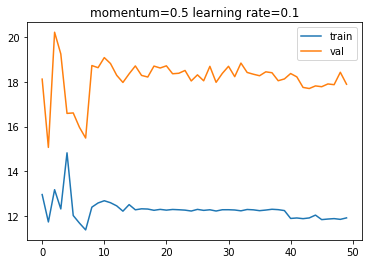

In [23]:
# no regulazation
l = 0.1
m = 0.5
model_lr_1 = Sequential([
        Dense(output_dim=hidden1_num_units,  activation='tanh'),
        Dense(output_dim=hidden2_num_units,  activation='tanh'),
        Dense(output_dim=output_num_units),
 ])
opt = SGD(lr=l, momentum=m)
model_lr_1.compile(loss=vector_mse, optimizer=opt, metrics=[vector_mse,'mse'])
history = model_lr_1.fit(X_train, y_train, epochs=n_ep, batch_size=batch_size, validation_data = (X_val,y_val))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.title('momentum='+str(m)+' learning rate='+str(l))
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('Test 1.png')

# Test 2

/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=10)`
  """
/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=10)`
  
/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8)`
  import sys


Train on 832 samples, validate on 209 samples
Epoch 1/50
832/832 [==============================] - 1s 885us/step - loss: 15.6339 - vector_mse: 15.6339 - mean_squared_error: 127.6801 - val_loss: 21.7886 - val_vector_mse: 21.7886 - val_mean_squared_error: 174.5820
Epoch 2/50
832/832 [==============================] - 0s 392us/step - loss: 15.0568 - vector_mse: 15.0568 - mean_squared_error: 123.3811 - val_loss: 19.6508 - val_vector_mse: 19.6508 - val_mean_squared_error: 157.6227
Epoch 3/50
832/832 [==============================] - 0s 428us/step - loss: 14.4985 - vector_mse: 14.4985 - mean_squared_error: 119.2827 - val_loss: 17.1601 - val_vector_mse: 17.1601 - val_mean_squared_error: 137.5039
Epoch 4/50
832/832 [==============================] - 0s 453us/step - loss: 12.1779 - vector_mse: 12.1779 - mean_squared_error: 101.5803 - val_loss: 17.1193 - val_vector_mse: 17.1193 - val_mean_squared_error: 138.5043
Epoch 5/50
832/832 [==============================] - 0s 506us/step - loss: 13.373

832/832 [==============================] - 0s 391us/step - loss: 13.9304 - vector_mse: 13.9304 - mean_squared_error: 114.3411 - val_loss: 20.4357 - val_vector_mse: 20.4357 - val_mean_squared_error: 163.1648
Epoch 39/50
832/832 [==============================] - 0s 368us/step - loss: 13.9181 - vector_mse: 13.9181 - mean_squared_error: 114.4000 - val_loss: 20.3839 - val_vector_mse: 20.3839 - val_mean_squared_error: 162.1540
Epoch 40/50
832/832 [==============================] - 0s 407us/step - loss: 14.0988 - vector_mse: 14.0988 - mean_squared_error: 115.8379 - val_loss: 20.3895 - val_vector_mse: 20.3895 - val_mean_squared_error: 162.7076
Epoch 41/50
832/832 [==============================] - 0s 397us/step - loss: 13.9597 - vector_mse: 13.9597 - mean_squared_error: 114.7951 - val_loss: 22.0833 - val_vector_mse: 22.0833 - val_mean_squared_error: 174.2358
Epoch 42/50
832/832 [==============================] - 0s 385us/step - loss: 14.0444 - vector_mse: 14.0444 - mean_squared_error: 115.662

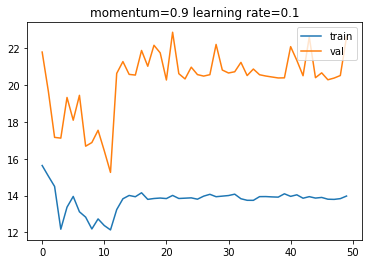

In [24]:
# no regulazation
l = 0.1
m = 0.9
model_lr_2 = Sequential([
        Dense(output_dim=hidden1_num_units,  activation='tanh'),
        Dense(output_dim=hidden2_num_units,  activation='tanh'),
        Dense(output_dim=output_num_units),
 ])
opt = SGD(lr=l, momentum=m)
model_lr_2.compile(loss=vector_mse, optimizer=opt, metrics=[vector_mse,'mse'])
history = model_lr_2.fit(X_train, y_train, epochs=n_ep, batch_size=batch_size, validation_data = (X_val,y_val))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.title('momentum='+str(m)+' learning rate='+str(l))
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('Test 2.png')

# Test 3

/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=10)`
  """
/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=10)`
  
/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8)`
  import sys


Train on 832 samples, validate on 209 samples
Epoch 1/50
832/832 [==============================] - 1s 782us/step - loss: 13.2085 - vector_mse: 13.2085 - mean_squared_error: 109.4678 - val_loss: 15.5028 - val_vector_mse: 15.5028 - val_mean_squared_error: 125.7300
Epoch 2/50
832/832 [==============================] - 0s 456us/step - loss: 11.2667 - vector_mse: 11.2667 - mean_squared_error: 94.3983 - val_loss: 15.7124 - val_vector_mse: 15.7124 - val_mean_squared_error: 127.3590
Epoch 3/50
832/832 [==============================] - 1s 613us/step - loss: 10.8037 - vector_mse: 10.8037 - mean_squared_error: 90.6639 - val_loss: 14.8868 - val_vector_mse: 14.8868 - val_mean_squared_error: 120.6168
Epoch 4/50
832/832 [==============================] - 0s 475us/step - loss: 11.1817 - vector_mse: 11.1817 - mean_squared_error: 93.6546 - val_loss: 14.3124 - val_vector_mse: 14.3124 - val_mean_squared_error: 116.6148
Epoch 5/50
832/832 [==============================] - 0s 462us/step - loss: 10.8234 -

832/832 [==============================] - 0s 309us/step - loss: 12.3456 - vector_mse: 12.3456 - mean_squared_error: 102.4800 - val_loss: 16.7757 - val_vector_mse: 16.7757 - val_mean_squared_error: 135.3679
Epoch 39/50
832/832 [==============================] - 0s 299us/step - loss: 12.3657 - vector_mse: 12.3657 - mean_squared_error: 102.6361 - val_loss: 16.8317 - val_vector_mse: 16.8317 - val_mean_squared_error: 135.8327
Epoch 40/50
832/832 [==============================] - 0s 309us/step - loss: 12.3274 - vector_mse: 12.3274 - mean_squared_error: 102.3435 - val_loss: 16.7429 - val_vector_mse: 16.7429 - val_mean_squared_error: 135.2018
Epoch 41/50
832/832 [==============================] - 0s 308us/step - loss: 12.3218 - vector_mse: 12.3218 - mean_squared_error: 102.3073 - val_loss: 16.7957 - val_vector_mse: 16.7957 - val_mean_squared_error: 135.5697
Epoch 42/50
832/832 [==============================] - 0s 310us/step - loss: 12.3559 - vector_mse: 12.3559 - mean_squared_error: 102.558

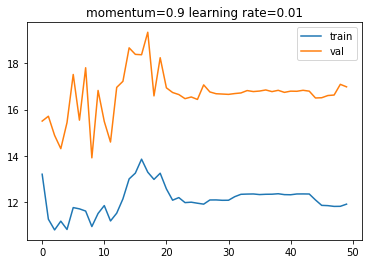

In [25]:
# no regulazation
l = 0.01
m = 0.9
model_lr_3 = Sequential([
        Dense(output_dim=hidden1_num_units,  activation='tanh'),
        Dense(output_dim=hidden2_num_units,  activation='tanh'),
        Dense(output_dim=output_num_units),
 ])
opt = SGD(lr=l, momentum=m)
model_lr_3.compile(loss=vector_mse, optimizer=opt, metrics=[vector_mse,'mse'])
history = model_lr_3.fit(X_train, y_train, epochs=n_ep, batch_size=batch_size, validation_data = (X_val,y_val))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.title('momentum='+str(m)+' learning rate='+str(l))
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('Test 3.png')

# Test 4

/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", kernel_regularizer=<keras.reg..., units=10)`
  
/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", kernel_regularizer=<keras.reg..., units=10)`
  import sys
/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8)`
  


Train on 832 samples, validate on 209 samples
Epoch 1/100
832/832 [==============================] - 1s 940us/step - loss: 13.1441 - vector_mse: 13.1411 - mean_squared_error: 108.9586 - val_loss: 15.9501 - val_vector_mse: 15.9424 - val_mean_squared_error: 128.7433
Epoch 2/100
832/832 [==============================] - 1s 651us/step - loss: 11.5767 - vector_mse: 11.5420 - mean_squared_error: 96.6040 - val_loss: 16.3945 - val_vector_mse: 16.3566 - val_mean_squared_error: 132.2641
Epoch 3/100
832/832 [==============================] - 0s 543us/step - loss: 11.1765 - vector_mse: 11.1380 - mean_squared_error: 93.4229 - val_loss: 15.5036 - val_vector_mse: 15.4641 - val_mean_squared_error: 125.4029
Epoch 4/100
832/832 [==============================] - 0s 576us/step - loss: 11.0745 - vector_mse: 11.0339 - mean_squared_error: 92.6244 - val_loss: 16.0111 - val_vector_mse: 15.9696 - val_mean_squared_error: 128.9787
Epoch 5/100
832/832 [==============================] - 0s 434us/step - loss: 11.0

832/832 [==============================] - 1s 608us/step - loss: 12.0232 - vector_mse: 11.7823 - mean_squared_error: 98.0916 - val_loss: 17.5770 - val_vector_mse: 17.3367 - val_mean_squared_error: 139.4567
Epoch 39/100
832/832 [==============================] - 1s 617us/step - loss: 11.9471 - vector_mse: 11.7071 - mean_squared_error: 97.5412 - val_loss: 17.4199 - val_vector_mse: 17.1798 - val_mean_squared_error: 138.4896
Epoch 40/100
832/832 [==============================] - 0s 567us/step - loss: 11.7273 - vector_mse: 11.4877 - mean_squared_error: 95.8768 - val_loss: 17.4019 - val_vector_mse: 17.1628 - val_mean_squared_error: 138.4230
Epoch 41/100
832/832 [==============================] - 0s 537us/step - loss: 11.7180 - vector_mse: 11.4794 - mean_squared_error: 95.7807 - val_loss: 17.3445 - val_vector_mse: 17.1064 - val_mean_squared_error: 137.9537
Epoch 42/100
832/832 [==============================] - 0s 429us/step - loss: 11.7200 - vector_mse: 11.4823 - mean_squared_error: 95.8388

832/832 [==============================] - 0s 374us/step - loss: 11.8774 - vector_mse: 11.5224 - mean_squared_error: 96.1205 - val_loss: 18.1422 - val_vector_mse: 17.7879 - val_mean_squared_error: 142.9424
Epoch 76/100
832/832 [==============================] - 0s 489us/step - loss: 11.7853 - vector_mse: 11.4316 - mean_squared_error: 95.4408 - val_loss: 17.9885 - val_vector_mse: 17.6352 - val_mean_squared_error: 141.5606
Epoch 77/100
832/832 [==============================] - 0s 389us/step - loss: 11.7580 - vector_mse: 11.4054 - mean_squared_error: 95.2701 - val_loss: 17.6434 - val_vector_mse: 17.2915 - val_mean_squared_error: 139.2777
Epoch 78/100
832/832 [==============================] - 0s 535us/step - loss: 11.7659 - vector_mse: 11.4148 - mean_squared_error: 95.3405 - val_loss: 17.6569 - val_vector_mse: 17.3064 - val_mean_squared_error: 139.3332
Epoch 79/100
832/832 [==============================] - 0s 319us/step - loss: 11.7040 - vector_mse: 11.3542 - mean_squared_error: 94.8762

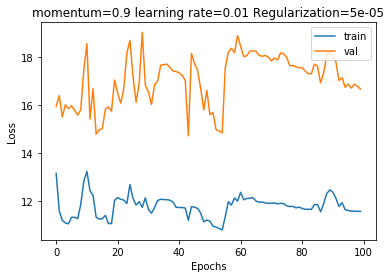

In [26]:
# regulazation
l = 0.01
m = 0.9
r = 0.00005
model_lr_4 = Sequential([
        Dense(output_dim=hidden1_num_units,  activation='tanh', kernel_regularizer=regularizers.l2(r)),
        Dense(output_dim=hidden2_num_units,  activation='tanh', kernel_regularizer=regularizers.l2(r)),
        Dense(output_dim=output_num_units),
 ])
opt = SGD(lr=l, momentum=m)
model_lr_4.compile(loss=vector_mse, optimizer=opt, metrics=[vector_mse,'mse'])
history = model_lr_4.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data = (X_val,y_val))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.title('momentum='+str(m)+' learning rate='+str(l)+" Regularization="+str(r))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('Test 5.png')

# Test 5

/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", kernel_regularizer=<keras.reg..., units=10)`
  
/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", kernel_regularizer=<keras.reg..., units=10)`
  import sys
/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8)`
  


Train on 832 samples, validate on 209 samples
Epoch 1/100
832/832 [==============================] - 1s 848us/step - loss: 13.5888 - vector_mse: 13.5631 - mean_squared_error: 112.1335 - val_loss: 16.7796 - val_vector_mse: 16.7306 - val_mean_squared_error: 134.9398
Epoch 2/100
832/832 [==============================] - 1s 645us/step - loss: 11.2382 - vector_mse: 11.1733 - mean_squared_error: 93.6666 - val_loss: 14.4523 - val_vector_mse: 14.3768 - val_mean_squared_error: 117.1554
Epoch 3/100
832/832 [==============================] - 0s 578us/step - loss: 12.1742 - vector_mse: 11.9843 - mean_squared_error: 99.6555 - val_loss: 17.2319 - val_vector_mse: 16.9384 - val_mean_squared_error: 136.2385
Epoch 4/100
832/832 [==============================] - 1s 689us/step - loss: 12.0059 - vector_mse: 11.5672 - mean_squared_error: 96.5393 - val_loss: 16.3652 - val_vector_mse: 15.7877 - val_mean_squared_error: 127.6383
Epoch 5/100
832/832 [==============================] - 1s 761us/step - loss: 11.5

832/832 [==============================] - 0s 495us/step - loss: 14.6889 - vector_mse: 13.3684 - mean_squared_error: 110.1158 - val_loss: 21.5730 - val_vector_mse: 20.2556 - val_mean_squared_error: 161.9370
Epoch 39/100
832/832 [==============================] - 0s 428us/step - loss: 14.4307 - vector_mse: 13.1393 - mean_squared_error: 108.4406 - val_loss: 21.4529 - val_vector_mse: 20.1865 - val_mean_squared_error: 161.2222
Epoch 40/100
832/832 [==============================] - 0s 367us/step - loss: 14.4473 - vector_mse: 13.2032 - mean_squared_error: 108.9708 - val_loss: 21.7030 - val_vector_mse: 20.4842 - val_mean_squared_error: 163.2169
Epoch 41/100
832/832 [==============================] - 0s 403us/step - loss: 14.3935 - vector_mse: 13.1987 - mean_squared_error: 108.8347 - val_loss: 20.1310 - val_vector_mse: 18.9560 - val_mean_squared_error: 151.7594
Epoch 42/100
832/832 [==============================] - 0s 409us/step - loss: 13.4887 - vector_mse: 12.3293 - mean_squared_error: 102

832/832 [==============================] - 1s 723us/step - loss: 12.9979 - vector_mse: 12.0863 - mean_squared_error: 100.3589 - val_loss: 18.5197 - val_vector_mse: 17.6210 - val_mean_squared_error: 141.5665
Epoch 76/100
832/832 [==============================] - 0s 548us/step - loss: 16.9044 - vector_mse: 12.3200 - mean_squared_error: 102.0801 - val_loss: 25.3182 - val_vector_mse: 17.6079 - val_mean_squared_error: 141.6324
Epoch 77/100
832/832 [==============================] - 0s 430us/step - loss: 19.1747 - vector_mse: 11.6146 - mean_squared_error: 96.8165 - val_loss: 23.8733 - val_vector_mse: 16.4662 - val_mean_squared_error: 132.8502
Epoch 78/100
832/832 [==============================] - 1s 718us/step - loss: 18.6947 - vector_mse: 11.4344 - mean_squared_error: 95.4602 - val_loss: 23.8004 - val_vector_mse: 16.6859 - val_mean_squared_error: 134.8115
Epoch 79/100
832/832 [==============================] - 1s 607us/step - loss: 18.4968 - vector_mse: 11.5171 - mean_squared_error: 96.10

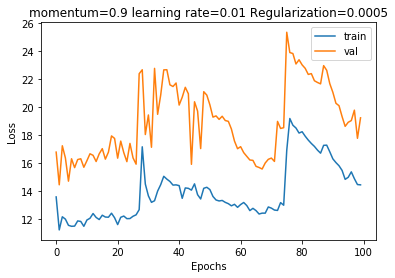

In [27]:
# regulazation
l = 0.01
m = 0.9
r = 0.0005
model_lr_5 = Sequential([
        Dense(output_dim=hidden1_num_units,  activation='tanh', kernel_regularizer=regularizers.l2(r)),
        Dense(output_dim=hidden2_num_units,  activation='tanh', kernel_regularizer=regularizers.l2(r)),
        Dense(output_dim=output_num_units),
 ])
opt = SGD(lr=l, momentum=m)
model_lr_5.compile(loss=vector_mse, optimizer=opt, metrics=[vector_mse,'mse'])
history = model_lr_5.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data = (X_val,y_val))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.title('momentum='+str(m)+' learning rate='+str(l)+" Regularization="+str(r))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('Test 6.png')

# Test 6

/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", kernel_regularizer=<keras.reg..., units=10)`
  import sys
/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", kernel_regularizer=<keras.reg..., units=10)`
  if __name__ == '__main__':
/Users/Veronica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8)`
  # This is added back by InteractiveShellApp.init_path()


Train on 832 samples, validate on 209 samples
Epoch 1/50
832/832 [==============================] - 1s 1ms/step - loss: 14.2361 - vector_mse: 14.1950 - mean_squared_error: 116.8104 - val_loss: 16.1901 - val_vector_mse: 16.0395 - val_mean_squared_error: 129.6851
Epoch 2/50
832/832 [==============================] - 1s 692us/step - loss: 12.8107 - vector_mse: 12.6136 - mean_squared_error: 104.4820 - val_loss: 18.6761 - val_vector_mse: 18.4402 - val_mean_squared_error: 147.6219
Epoch 3/50
832/832 [==============================] - 0s 577us/step - loss: 13.7116 - vector_mse: 13.3886 - mean_squared_error: 110.4502 - val_loss: 16.7620 - val_vector_mse: 16.4220 - val_mean_squared_error: 132.7223
Epoch 4/50
832/832 [==============================] - 1s 651us/step - loss: 13.2938 - vector_mse: 12.9496 - mean_squared_error: 107.2788 - val_loss: 16.3939 - val_vector_mse: 16.0430 - val_mean_squared_error: 129.4180
Epoch 5/50
832/832 [==============================] - 0s 538us/step - loss: 13.0772 

832/832 [==============================] - 1s 697us/step - loss: 13.3128 - vector_mse: 12.6650 - mean_squared_error: 104.9463 - val_loss: 17.7087 - val_vector_mse: 16.9889 - val_mean_squared_error: 136.9851
Epoch 39/50
832/832 [==============================] - 1s 677us/step - loss: 13.3423 - vector_mse: 12.6280 - mean_squared_error: 104.6754 - val_loss: 17.5623 - val_vector_mse: 16.8588 - val_mean_squared_error: 135.7697
Epoch 40/50
832/832 [==============================] - 1s 726us/step - loss: 13.0448 - vector_mse: 12.3506 - mean_squared_error: 102.4380 - val_loss: 16.9389 - val_vector_mse: 16.2523 - val_mean_squared_error: 131.3128
Epoch 41/50
832/832 [==============================] - 0s 549us/step - loss: 13.2734 - vector_mse: 12.5271 - mean_squared_error: 103.8793 - val_loss: 17.7669 - val_vector_mse: 16.9750 - val_mean_squared_error: 136.7844
Epoch 42/50
832/832 [==============================] - 0s 586us/step - loss: 13.3385 - vector_mse: 12.5570 - mean_squared_error: 104.214

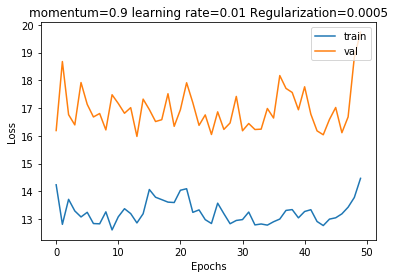

In [29]:
# regulazation
l = 0.01
m = 0.9
r = 0.0005
d = 0.25
model_lr_6 = Sequential([
        Dense(output_dim=hidden1_num_units,  activation='tanh', kernel_regularizer=regularizers.l2(r)),
        Dropout(d),
        Dense(output_dim=hidden2_num_units,  activation='tanh', kernel_regularizer=regularizers.l2(r)),
        Dropout(d),
        Dense(output_dim=output_num_units),
 ])
opt = SGD(lr=l, momentum=m)
model_lr_6.compile(loss=vector_mse, optimizer=opt, metrics=[vector_mse,'mse'])
history = model_lr_6.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data = (X_val,y_val))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.title('momentum='+str(m)+' learning rate='+str(l)+" Regularization="+str(r))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('Test 7.png')

# Prediction
## 4.5% upward

In [53]:
X_unseen = np.array([[4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 10]])
predictions_1= model_lr_1.predict(X_unseen)
predictions_2= model_lr_2.predict(X_unseen)
predictions_3= model_lr_3.predict(X_unseen)
predictions_4= model_lr_4.predict(X_unseen)
predictions_5= model_lr_5.predict(X_unseen)
predictions_6= model_lr_6.predict(X_unseen)



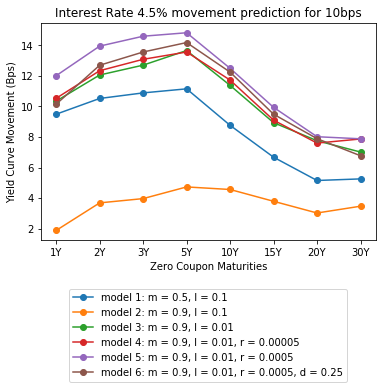

In [54]:
#%matplotlib inline
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(predictions_1[0], marker = 'o',label = 'model 1: m = 0.5, l = 0.1')
ax.plot(predictions_2[0], marker = 'o',label = 'model 2: m = 0.9, l = 0.1')
ax.plot(predictions_3[0], marker = 'o',label = 'model 3: m = 0.9, l = 0.01')
ax.plot(predictions_4[0], marker = 'o',label = 'model 4: m = 0.9, l = 0.01, r = 0.00005')
ax.plot(predictions_5[0], marker = 'o',label = 'model 5: m = 0.9, l = 0.01, r = 0.0005')
ax.plot(predictions_6[0], marker = 'o',label = 'model 6: m = 0.9, l = 0.01, r = 0.0005, d = 0.25')
#plt.plot(predictions_2[0])

ax.set_xlabel('Zero Coupon Maturities')
plt.xticks(range(8), x_label)
ax.set_ylabel('Yield Curve Movement (Bps)')
lgd = ax.legend(loc='upper center', bbox_to_anchor = (0.5,-0.2))
plt.title("Interest Rate 4.5% movement prediction for 10bps")

plt.savefig('4.5_Up.png',bbox_extra_artists =(lgd,),bbox_inces='tight' )
plt.show()

## 4.5% downward

In [59]:
X_unseen = np.array([[4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, -10]])
predictions_1= model_lr_1.predict(X_unseen)
predictions_2= model_lr_2.predict(X_unseen)
predictions_3= model_lr_3.predict(X_unseen)
predictions_4= model_lr_4.predict(X_unseen)
predictions_5= model_lr_5.predict(X_unseen)
predictions_6= model_lr_6.predict(X_unseen)


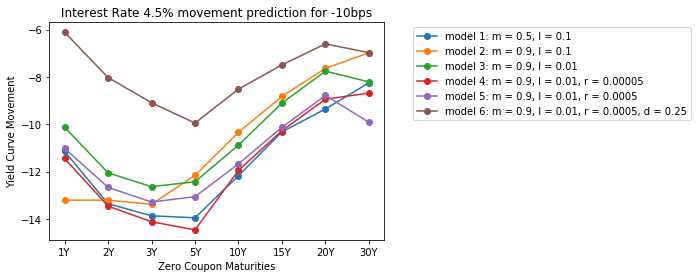

In [60]:
plt.plot(predictions_1[0], marker = 'o',label = 'model 1: m = 0.5, l = 0.1')
plt.plot(predictions_2[0], marker = 'o',label = 'model 2: m = 0.9, l = 0.1')
plt.plot(predictions_3[0], marker = 'o',label = 'model 3: m = 0.9, l = 0.01')
plt.plot(predictions_4[0], marker = 'o',label = 'model 4: m = 0.9, l = 0.01, r = 0.00005')
plt.plot(predictions_5[0], marker = 'o',label = 'model 5: m = 0.9, l = 0.01, r = 0.0005')
plt.plot(predictions_6[0], marker = 'o',label = 'model 6: m = 0.9, l = 0.01, r = 0.0005, d = 0.25')
#plt.plot(predictions_2[0])

plt.xlabel('Zero Coupon Maturities')
plt.xticks(range(8), x_label)
plt.ylabel('Yield Curve Movement')
plt.legend(loc='upper center', bbox_to_anchor = (1.5,1))
plt.title("Interest Rate 4.5% movement prediction for -10bps")


plt.savefig('4.5_down.png')
plt.show()

# 1% upward

In [61]:
X_unseen = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 10]])
predictions_1= model_lr_1.predict(X_unseen)
predictions_2= model_lr_2.predict(X_unseen)
predictions_3= model_lr_3.predict(X_unseen)
predictions_4= model_lr_4.predict(X_unseen)
predictions_5= model_lr_5.predict(X_unseen)
predictions_6= model_lr_6.predict(X_unseen)

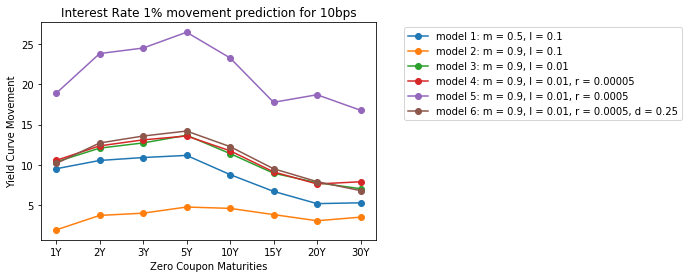

In [62]:
plt.plot(predictions_1[0], marker = 'o',label = 'model 1: m = 0.5, l = 0.1')
plt.plot(predictions_2[0], marker = 'o',label = 'model 2: m = 0.9, l = 0.1')
plt.plot(predictions_3[0], marker = 'o',label = 'model 3: m = 0.9, l = 0.01')
plt.plot(predictions_4[0], marker = 'o',label = 'model 4: m = 0.9, l = 0.01, r = 0.00005')
plt.plot(predictions_5[0], marker = 'o',label = 'model 5: m = 0.9, l = 0.01, r = 0.0005')
plt.plot(predictions_6[0], marker = 'o',label = 'model 6: m = 0.9, l = 0.01, r = 0.0005, d = 0.25')
#plt.plot(predictions_2[0])

plt.xlabel('Zero Coupon Maturities')
plt.xticks(range(8), x_label)
plt.ylabel('Yield Curve Movement')
plt.legend(loc='upper center', bbox_to_anchor = (1.5,1))
plt.title("Interest Rate 1% movement prediction for 10bps")


plt.savefig('1_up.png')
plt.show()

# 1% downward

In [63]:
X_unseen = np.array([[1, 1, 1, 1, 1, 1, 1, 1, -10]])
predictions_1= model_lr_1.predict(X_unseen)
predictions_2= model_lr_2.predict(X_unseen)
predictions_3= model_lr_3.predict(X_unseen)
predictions_4= model_lr_4.predict(X_unseen)
predictions_5= model_lr_5.predict(X_unseen)
predictions_6= model_lr_6.predict(X_unseen)

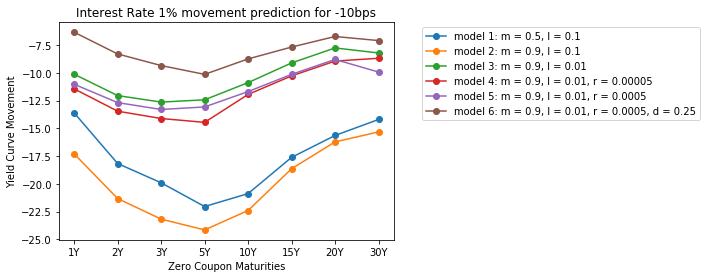

In [64]:
plt.plot(predictions_1[0], marker = 'o',label = 'model 1: m = 0.5, l = 0.1')
plt.plot(predictions_2[0], marker = 'o',label = 'model 2: m = 0.9, l = 0.1')
plt.plot(predictions_3[0], marker = 'o',label = 'model 3: m = 0.9, l = 0.01')
plt.plot(predictions_4[0], marker = 'o',label = 'model 4: m = 0.9, l = 0.01, r = 0.00005')
plt.plot(predictions_5[0], marker = 'o',label = 'model 5: m = 0.9, l = 0.01, r = 0.0005')
plt.plot(predictions_6[0], marker = 'o',label = 'model 6: m = 0.9, l = 0.01, r = 0.0005, d = 0.25')
#plt.plot(predictions_2[0])

plt.xlabel('Zero Coupon Maturities')
plt.xticks(range(8), x_label)
plt.ylabel('Yield Curve Movement')
plt.legend(loc='upper center', bbox_to_anchor = (1.5,1))
plt.title("Interest Rate 1% movement prediction for -10bps")

plt.savefig('1_down.png')
plt.show()

In [73]:
test_loss = model_2.evaluate(X_test, y_test)

447/447 [==============================] - 0s 59us/step


In [76]:
y_pred = model_2.predict(X_test)

# PCA Prediction

In [124]:
def PCA_prediction(X):
    inputPCA = np.dot(np.array(eigVec), X[0:8]) 
    chgP = X[8:9]/eigVec[0,PCA_indicator]
    inputPCAChg = np.concatenate((inputPCA[0]+chgP, inputPCA[1:3])) 
    approxPCA =  np.dot(inputPCAChg, eigVec)
    chg_original = approxPCA - X[0:8]
    #chg_original = chg_original*10000 # scale the data
    return chg_original

In [186]:
sample = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.001]
#P_1 = PCA_prediction(sample)
P_1*10


array([-0.02507028, -0.0180266 , -0.01579872, -0.01570817, -0.01909619,
       -0.02115705, -0.02666141, -0.01405329])

# Comparision with the PCA prediction

In [166]:
# calculate the diff:
error = 0
a = 0
for i in range(len(X_test)):
    prep_PCA = X_test[i,]
    prep_PCA = np.concatenate((prep_PCA[0:8]/100, prep_PCA[8:9]/10000))  # scaled back
    P_1 = PCA_prediction(prep_PCA)
    error = error + 1/8*np.sum(((P_1 - y_test[i,]/10000)**2))

In [167]:
error

0.001120308771402903

In [162]:
#Choose Model 6
y_pred_1= model_lr_1.predict(X_test)
y_pred_2= model_lr_2.predict(X_test)
y_pred_3= model_lr_3.predict(X_test)
y_pred_4= model_lr_4.predict(X_test)
y_pred_5= model_lr_5.predict(X_test)
y_pred_6= model_lr_6.predict(X_test)


In [174]:
def calculate_ANN_MSE (y_pred):
    error_ANN = 0
    error_sing = 0
    for i in range(len(y_test)):
        error_ANN = error_ANN + 1/8*np.sum((y_pred[i,]/10000-y_test[i,]/10000)**2)
        error_sing = error_sing + (y_pred[i,3]/10000-y_test[i,3]/10000)**2
    return error_ANN, error_sing

In [169]:
error_ANN

0.0005223121466934942

In [175]:
print ("Model 1: ", calculate_ANN_MSE(y_pred_1))
print ("Model 2: ", calculate_ANN_MSE(y_pred_2))
print ("Model 3: ", calculate_ANN_MSE(y_pred_3))
print ("Model 4: ", calculate_ANN_MSE(y_pred_4))
print ("Model 5: ", calculate_ANN_MSE(y_pred_5))
print ("Model 6: ", calculate_ANN_MSE(y_pred_6))

Model 1:  (0.000541299879449811, 0.00036124033339984503)
Model 2:  (0.0006467228721292778, 0.0004922493498506448)
Model 3:  (0.0005441833055678574, 0.0003624776869057247)
Model 4:  (0.0005148672789293263, 0.00032135213977702894)
Model 5:  (0.0005216761324441799, 0.0003286529173047202)
Model 6:  (0.0005899907627803514, 0.00044004523500581154)


# Compared  ANN vs PCA

In [230]:
X_3 = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.002]
X_3_input =  np.array([[1, 1, 1, 1, 1, 1, 1, 1, 20]])
PCA_Y_1 = PCA_prediction(X_3)
PCA_Y_1 = PCA_Y_1*10000

X_4 = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, -0.002]
X_4_input =  np.array([[1, 1, 1, 1, 1, 1, 1, 1, -20]])
PCA_Y_2 = PCA_prediction(X_4)
PCA_Y_2 = PCA_Y_2*10000

ANN_Y_1= model_lr_6.predict(X_3_input)
ANN_Y_2= model_lr_6.predict(X_4_input)

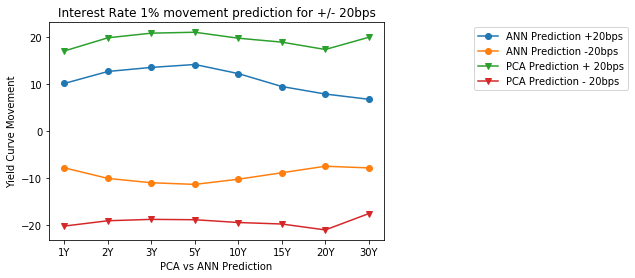

In [231]:
plt.plot(ANN_Y_1[0], marker = 'o',label = 'ANN Prediction +20bps')
plt.plot(ANN_Y_2[0], marker = 'o',label = 'ANN Prediction -20bps')
plt.plot(PCA_Y_1, marker = 'v',label = 'PCA Prediction + 20bps')
plt.plot(PCA_Y_2, marker = 'v',label = 'PCA Prediction - 20bps')


plt.xlabel('PCA vs ANN Prediction')
plt.xticks(range(8), x_label)
plt.ylabel('Yield Curve Movement')
plt.legend(loc='upper center', bbox_to_anchor = (1.5,1))
plt.title("Interest Rate 1% movement prediction for +/- 20bps")

plt.savefig('PCA vs ANN 1.png')
plt.show()

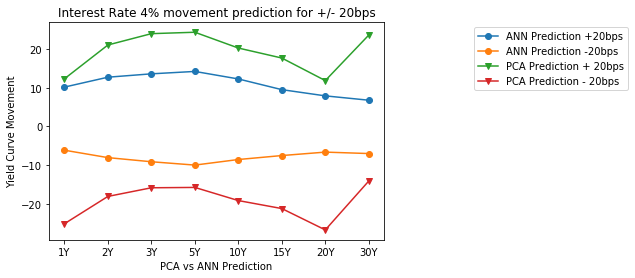

In [208]:
X_1 = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.002]
X_1_input =  np.array([[4, 4, 4, 4, 4, 4, 4, 4, 15]])
PCA_Y_1 = PCA_prediction(X_1)
PCA_Y_1 = PCA_Y_1*10000

X_2 = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, -0.002]
X_2_input =  np.array([[4, 4, 4, 4, 4, 4, 4, 4, -5]])
PCA_Y_2 = PCA_prediction(X_2)
PCA_Y_2 = PCA_Y_2*10000

ANN_Y_1= model_lr_6.predict(X_1_input)
ANN_Y_2= model_lr_6.predict(X_2_input)

plt.plot(ANN_Y_1[0], marker = 'o',label = 'ANN Prediction +20bps')
plt.plot(ANN_Y_2[0], marker = 'o',label = 'ANN Prediction -20bps')
plt.plot(PCA_Y_1, marker = 'v',label = 'PCA Prediction + 20bps')
plt.plot(PCA_Y_2, marker = 'v',label = 'PCA Prediction - 20bps')


plt.xlabel('PCA vs ANN Prediction')
plt.xticks(range(8), x_label)
plt.ylabel('Yield Curve Movement')
plt.legend(loc='upper center', bbox_to_anchor = (1.5,1))
plt.title("Interest Rate 4% movement prediction for +/- 20bps")

plt.savefig('PCA vs ANN 1.png')
plt.show()